In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [44]:
# Read in the dataset (500,000 smaller version)
df = pd.read_csv("cleaned_us_accidents.csv", usecols=["Amenity","Bump","Crossing","Give_Way","No_Exit","Roundabout","Station","Stop","Traffic_Calming","Traffic_Signal","Turning_Loop","Severity"])
dfs = pd.read_csv("cleaned_us_accidents.csv", usecols=["State","Start_Time","End_Time","Severity"])
dfraw = pd.read_csv("US_Accidents_March23_sampled_500k.csv")

In [45]:
dfraw.isna().sum()

ID                            0
Source                        0
Severity                      0
Start_Time                    0
End_Time                      0
Start_Lat                     0
Start_Lng                     0
End_Lat                  220377
End_Lng                  220377
Distance(mi)                  0
Description                   1
Street                      691
City                         19
County                        0
State                         0
Zipcode                     116
Country                       0
Timezone                    507
Airport_Code               1446
Weather_Timestamp          7674
Temperature(F)            10466
Wind_Chill(F)            129017
Humidity(%)               11130
Pressure(in)               8928
Visibility(mi)            11291
Wind_Direction            11197
Wind_Speed(mph)           36987
Precipitation(in)        142616
Weather_Condition         11101
Amenity                       0
Bump                          0
Crossing

###
Amenity     -       Refers to particular places such as restaurant, library, college, bar, etc.
Bump        -       Refers to speed bump or hump to reduce the speed.
Crossing    -       Refers to any crossing across roads for pedestrians, cyclists, etc.
Give-way    -       A sign on road which shows priority of passing.
Junction    -       Refers to any highway ramp, exit, or entrance.
No-exit     -       Indicates there is no possibility to travel further by any transport mode along a formal path or route.
Railway     -       Indicates the presence of railways.
Roundabout  -       Refers to a circular road junction.
Station     -       Refers to public transportation station (bus, metro, etc.).
Stop        -       Refers to stop sign.
Traffic Calming -   Refers to any means for slowing down traffic speed.
Traffic Signal -    Refers to traffic signal on intersections.
Turning Loop    -   Indicates a widened area of a highway with a non-traversable island for turning around.

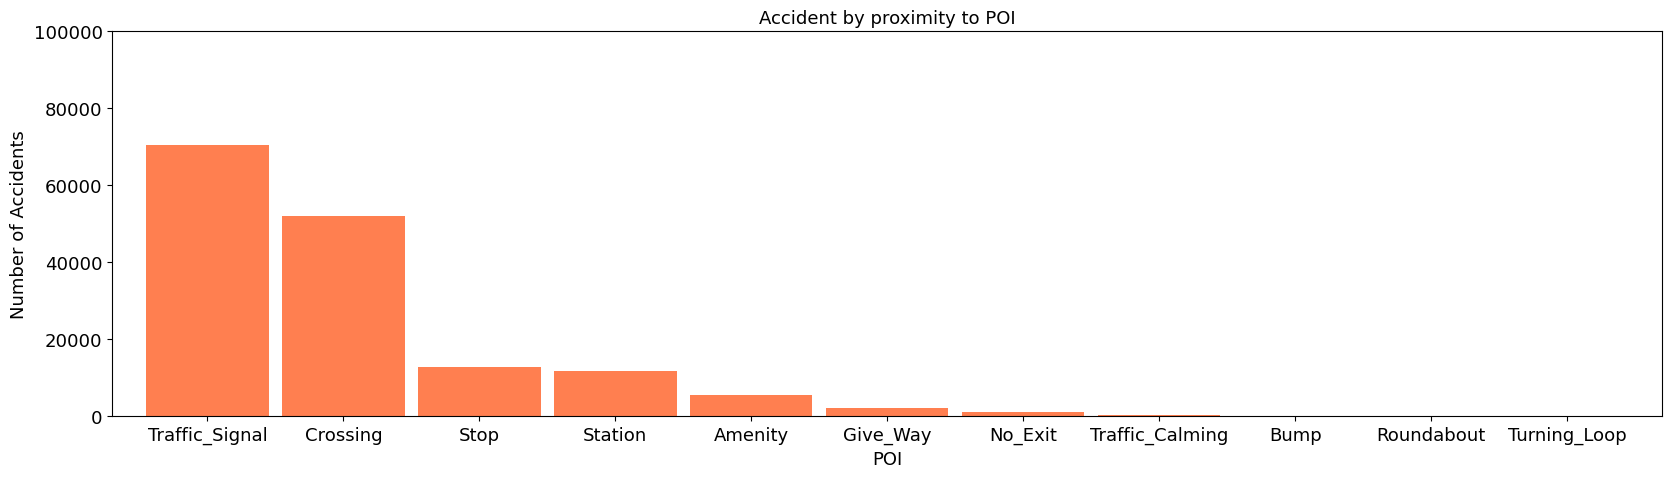

In [17]:
# Show accidents counts by proximity to each POI
poi_cols = ["Amenity","Bump","Crossing","Give_Way","No_Exit","Roundabout","Station","Stop","Traffic_Calming","Traffic_Signal","Turning_Loop"]
counts = df[poi_cols].sum().sort_values(ascending=False)
# create the plot
plot_axis = counts.plot(
    kind="bar",
    figsize=(20, 5),
    fontsize=13,
    color="coral",
    width=0.9,
    rot=0
)

# customise the axes and title
plot_axis.set_ylim((0, 100000))
plot_axis.set_xlabel("POI", fontsize=13)
plot_axis.set_ylabel("Number of Accidents", fontsize=13)
plot_axis.set_title("Accident by proximity to POI", fontsize=13)
plt.show()

We see then that the majority of accidents take place at junctions. This is indicated by Traffic_signal, Crossing, and Stop. With all other POIs contributing a small number. We will now look at the top 5 POI features by severity to see for any patterns.

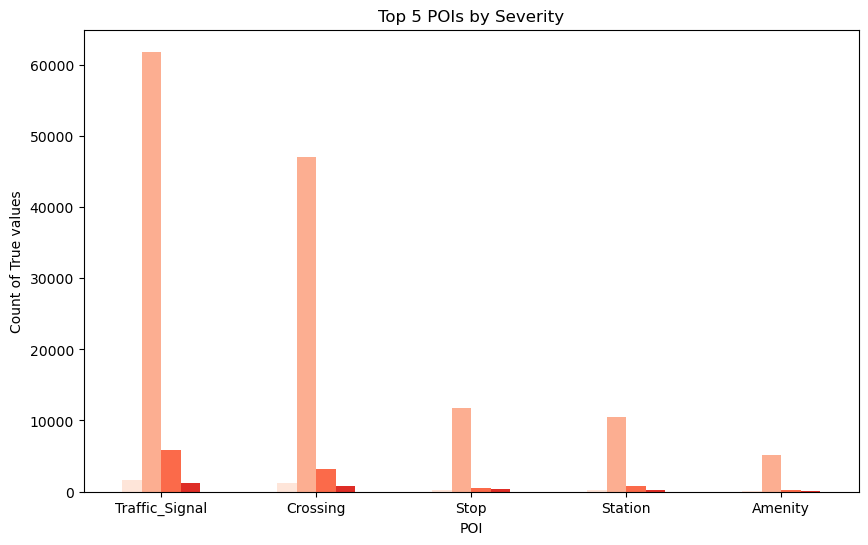

In [42]:
colors = ['#fee5d9', '#fcae91', '#fb6a4a', '#de2d26', '#a50f15']

severity_cols = ["Traffic_Signal","Crossing","Stop","Station","Amenity"]

plot_data = df.groupby("Severity", observed=True)[poi_cols].sum().T

ax = plot_data.plot(kind="bar", figsize=(10,6), color=colors)
ax.set_xlabel("POI")
ax.set_ylabel("Count of True values")
ax.set_title("Top 5 POIs by Severity")
plt.xticks(rotation=0)
plt.legend('',frameon=False)
plt.show()

### Comparing accident data by states
First we will need to standardise, we will can do this by population, road users, total amount of road, or some other factor. It may be easiest to find populations for each state for each year and use these values?